In [83]:
#imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [84]:
df = pd.read_csv("/Users/gabeprice/Library/Messages/Attachments/df/15/154EE127-80F2-4F88-9446-055DA88386DD/Car_Health_Metrics_Dataset.csv")
df

,HeartRate,BloodOxygenLevel,NoiseLevel,Score
0,63.761181,97.479150,70.468829,88.709160
1,78.240789,99.177881,77.597383,87.983947
2,64.434949,97.105226,69.537317,88.077492
3,62.179323,99.565248,62.657563,78.271638
4,80.943299,97.846916,67.761804,81.665422
...,...,...,...,...
34995,80.524325,99.630628,71.609517,84.454565
34996,70.657464,95.821085,64.271135,86.434756
34997,82.954991,97.306875,73.979477,85.331360
34998,81.769338,98.222699,80.388383,82.619580


As we see below, the data is not suitable for a linear regression model; therefore, we will conduct a logistic regression model.

<Axes: xlabel='HeartRate', ylabel='Score'>

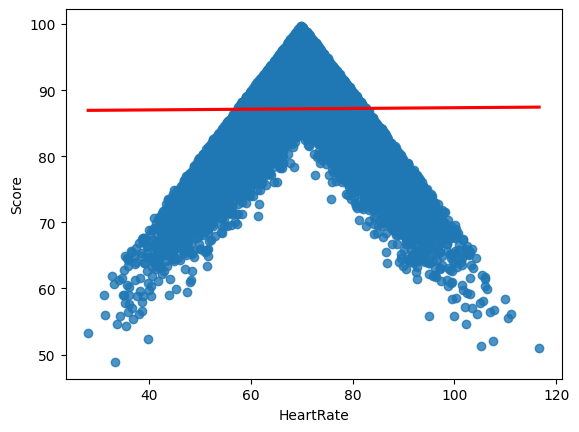

In [85]:
sns.regplot(data=df, x="HeartRate", y="Score", ci=None, line_kws={'color':'red'})

Here, we played around with a heatmap. We will come back to this later in the day and see where it brings us.

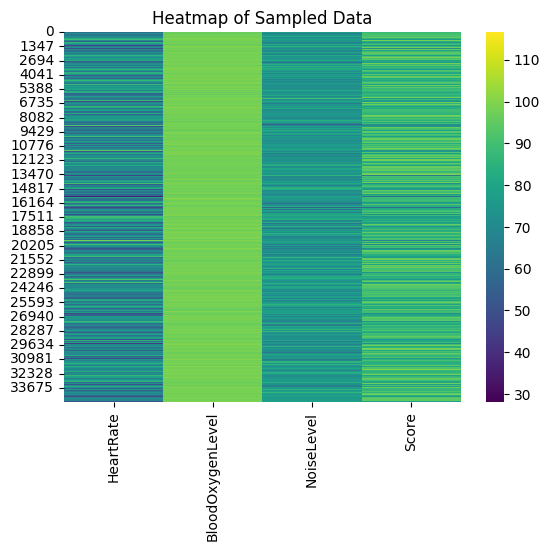

In [86]:
# Create a heatmap from the sampled data
sns.heatmap(df, annot=False, cmap="viridis")
plt.title('Heatmap of Sampled Data')
plt.show()

Next, we will start to conduct the logistic regression. Below are the notes and thought processes used when conducting this data visualization model:
- we want to make sure that we are able to draw a concrete conclusion from this model
- we decided logistic regression was not the move because we are dealing with continuous data and not binary

Now we will attempt linear regression
- we decided that linear regression was not the move because the MSE was too high; moreover, the results would not be as accurate as we would have liked

Now, Krish has sparked the idea of using Random Forest Regression
- this has proven to be an amazing idea
- we have come to the conclusion that the MSE will always be below 1 and the R-sqaured value will rest around 0.99

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable y
y = df['Score']

# Define the feature matrix X
X = df[['HeartRate', 'BloodOxygenLevel', 'NoiseLevel']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.12350152356368314
R-squared: 0.9973205002079096


Here we have completed a KNN classifier to predict the scores for the next two week period.
- when I get back from lunch, I will attempt to create a column with the predicteed scores of the next two week period
- after this, we will attempt to give feedback

In addition, I must find the correct model to give feedback based off of how much a driver varies along with their bias (how good of a driver they are)

Training Mean Squared Error: 7.942222222222223
Predicted Score for the Next Two-Week Period: 78.0


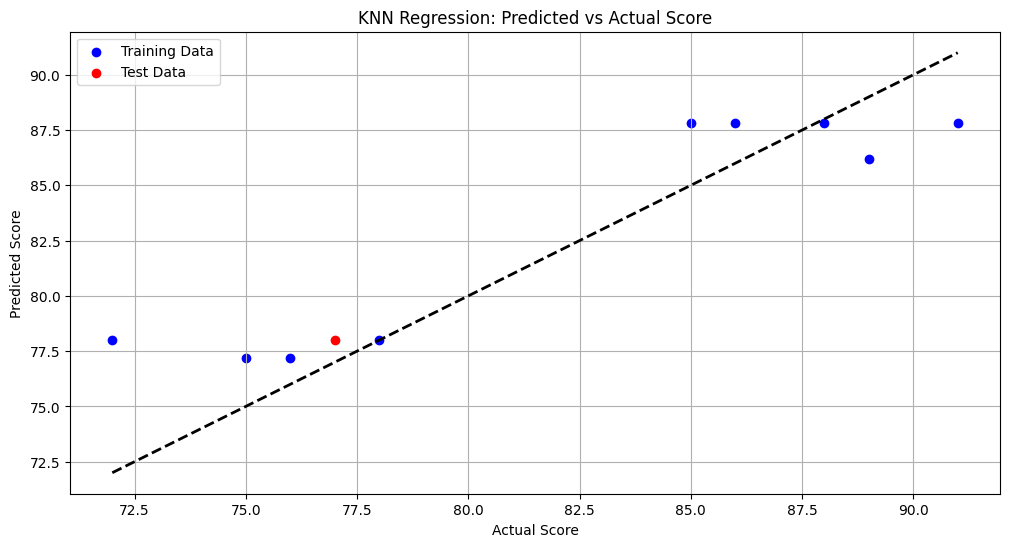

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Example DataFrame for historical data (you should replace this with your actual data)
API_data = {
    'HeartRate': [64, 78, 64, 62, 81, 81, 71, 83, 82, 69],
    'BloodOxygenLevel': [97, 99, 97, 100, 98, 100, 96, 97, 98, 98],
    'NoiseLevel': [70, 78, 70, 63, 68, 72, 64, 74, 80, 64],
    'Score': [75, 85, 76, 72, 89, 91, 78, 88, 86, 77]
}


df = pd.DataFrame(API_data)

# Define the feature matrix X and target variable y
X = df[['HeartRate', 'BloodOxygenLevel', 'NoiseLevel']]
y = df['Score']

# Split the data into training and testing sets
X_train = X[:-1]
X_test = X[-1:]
y_train = y[:-1]
y_test = y[-1:]

# Initialize the KNN regressor with k=5 (you can adjust this number)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
train_predictions = knn_regressor.predict(X_train)
test_predictions = knn_regressor.predict(X_test)

# Evaluate the model using the training set
train_mse = mean_squared_error(y_train, train_predictions)
print(f'Training Mean Squared Error: {train_mse}')

# Print the prediction for the next two-week period
if len(test_predictions) > 0:
    print(f'Predicted Score for the Next Two-Week Period: {test_predictions[0]}')
else:
    print('Prediction failed or test_predictions is empty.')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot training data and predictions
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

# Plot test data and predictions
plt.scatter(y_test, test_predictions, color='red', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression: Predicted vs Actual Score')
plt.legend()
plt.grid(True)
plt.show()


Now we will create 3 different function that returns a string feedback about if your score is a certain amount higher or lower the average. We will determine the over and under on the avg of the variables by making the sweet spot one standard deviation above and below the mean.

In [89]:
API_data = {
    'HeartRate': [64, 78, 64, 62, 81, 81, 71, 83, 82, 69],
    'BloodOxygenLevel': [97, 99, 97, 100, 98, 100, 96, 97, 98, 98],
    'NoiseLevel': [70, 78, 70, 63, 68, 72, 64, 74, 80, 64],
}

API_df = pd.DataFrame(API_data)

In [92]:
from scipy.stats import norm

def avgHeartRate(API_df):
    avg_heart_rate = API_df["HeartRate"].mean()
    std_heart_rate = API_df["HeartRate"].std()
    
    if input < (avg_heart_rate - std_heart_rate):
        return "Your heart rate over the past two weeks has been significantly lower than average. This may indicate an issue that should be addressed. Consider consulting a healthcare professional."
    elif input > (avg_heart_rate + std_heart_rate):
        return "Your heart rate over the past two weeks has been significantly higher than average. This may suggest increased stress levels. Consider stress-reduction techniques or consulting a healthcare professional if this persists."
    else:
        return "Your heart rate over the past two weeks has been within the normal range. Keep monitoring to maintain good health."


def avgBloodOxygen(API_df):
    avg_blood_oxygen = API_df["BloodOxygenLevel"].mean()
    std_blood_oxygen = API_df["BloodOxygenLevel"].std()
    
    if input < (avg_blood_oxygen - std_blood_oxygen):
        return "Your blood oxygen levels over the past two weeks have been significantly lower than average. This may indicate an issue that should be addressed. Consider consulting a healthcare professional."
    elif input > (avg_blood_oxygen + std_blood_oxygen):
        return "Your blood oxygen levels over the past two weeks have been higher than average. This is generally not a concern, but you should ensure you are breathing comfortably and regularly."
    else:
        return "Your blood oxygen levels over the past two weeks have been within the normal range. Keep monitoring to maintain good health."

def avgNoiseLevel(API_df):
    avg_noise_level = API_df["NoiseLevel"].mean()
    std_noise_level = API_df["NoiseLevel"].std()
    
    if input < (avg_noise_level - std_noise_level):
        return "The noise level over the past two weeks has been significantly lower than average. This could indicate a quieter environment than usual."
    elif input > (avg_noise_level + std_noise_level):
        return "The noise level over the past two weeks has been significantly higher than average. This may suggest a noisier environment which could affect concentration and comfort. Consider measures to reduce noise if possible."
    else:
        return "The noise level over the past two weeks has been within the normal range. Keep monitoring to maintain a comfortable environment."

    
input_noise_level = 75  # Replace with the actual input noise level
feedback = avgNoiseLevel(input_noise_level)
print(feedback)

# Example usage
input_heart_rate = 60  # Replace with the actual input heart rate
feedback = avgHeartRate(input_heart_rate)
print(feedback)

# Example usage
input_blood_oxygen = 95  # Replace with the actual input blood oxygen level
feedback = avgBloodOxygen(input_blood_oxygen)
print(feedback)


TypeError: 'int' object is not subscriptable

In [105]:
def DriverHistory(API_df, knn_model):
    avg_heart_rate = API_df["HeartRate"].mean()
    avg_blood_oxygen = API_df["BloodOxygenLevel"].mean()
    avg_noise_level = API_df["NoiseLevel"].mean()
    
    new_data = pd.DataFrame({
        'HeartRate': [avg_heart_rate],
        'BloodOxygenLevel': [avg_blood_oxygen],
        'NoiseLevel': [avg_noise_level]
    })

    # Predict the score for the new two-week period using the trained KNN model
    new_score_pred = knn_model.predict(new_data)
    curr = round(new_score_pred[0])

    if curr <= 75:
        print(f"With a score of {curr}, you need to work on improving your health and driving conditions. Consider monitoring your heart rate, blood oxygen levels, and reducing noise distractions.")
    elif 75 < curr < 90:
        print(f"With a score of {curr}, you are doing well, but there's still room for improvement. Keep an eye on your health metrics and driving environment to reach an optimal state.")
    else:
        print(f"With a score of {curr}, you are doing great! Keep up the good work maintaining your health and driving conditions.")

    return curr

# Calculate the predicted score using the DriverHistory function
predicted_score = DriverHistory(API_df, knn_regressor)
print(f'Predicted Score for the New Two-Week Period: {predicted_score}')

With a score of 92, you are doing great! Keep up the good work maintaining your health and driving conditions.
Predicted Score for the New Two-Week Period: 92


Now that we have developed functions to send the API_df averages up to the front end, let us calculate and save the API_df averages into a new Driver_History dataframe. This dataframe will contain all of the 2 week report averages for each driver.

In [99]:
import pandas as pd
import csv
import os
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import joblib
import numpy as np

In [100]:
output_file = "driver_history.csv"
if os.path.isfile(output_file):
    print("Output file already exists")
else:
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Average Heart Rate", "Average Blood Oxygen Level", "Average Noise Level", "Driver Score"])

In [101]:

def DriverHistory(API_df, model):
    heart_rate_avg = API_df["HeartRate"].mean()
    blood_oxygen_avg = API_df["BloodOxygenLevel"].mean()
    noise_level_avg = API_df["NoiseLevel"].mean()
    new_data = np.array([[heart_rate_avg, blood_oxygen_avg, noise_level_avg]])

    new_data_poly = model.named_steps['poly'].transform(new_data)
    new_data_scaled = model.named_steps['scaler'].transform(new_data_poly)
    predictions = model.named_steps['regressor'].predict(new_data_scaled)
    score = round(predictions[0])

    row = [heart_rate_avg, blood_oxygen_avg, noise_level_avg, score]
    with open(output_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(row)

In [102]:
import pandas as pd
import numpy as np

# Example function to create a DataFrame with random data
def create_dataframe():
    data = {
        'HeartRate': np.random.randint(60, 100, size=10),
        'BloodOxygenLevel': np.random.randint(95, 100, size=10),
        'NoiseLevel': np.random.randint(60, 80, size=10)
    }
    return pd.DataFrame(data)

# Create an array of DataFrames
num_dataframes = 5  # Specify the number of DataFrames you want
dataframes = [create_dataframe() for _ in range(num_dataframes)]

# Iterate through the array of DataFrames
for idx, df in enumerate(dataframes):
    print(f"DataFrame {idx + 1}")
    print(df)
    print()

# Example of processing each DataFrame
for idx, df in enumerate(dataframes):
    heart_rate_avg = df["HeartRate"].mean()
    blood_oxygen_avg = df["BloodOxygenLevel"].mean()
    noise_level_avg = df["NoiseLevel"].mean()
    print(f"DataFrame {idx + 1} Averages:")
    print(f"Avg HeartRate: {heart_rate_avg}")
    print(f"Avg BloodOxygenLevel: {blood_oxygen_avg}")
    print(f"Avg NoiseLevel: {noise_level_avg}")
    print()
    load_model = joblib.load("./driver_xgb_model.pkl")
    DriverHistory(API_df, load_model)


DataFrame 1
   HeartRate  BloodOxygenLevel  NoiseLevel
0         75                96          60
1         95                97          76
2         63                96          70
3         74                98          73
4         80                99          69
5         62                98          66
6         92                99          77
7         67                99          60
8         80                98          65
9         63                99          74

DataFrame 2
   HeartRate  BloodOxygenLevel  NoiseLevel
0         69                99          66
1         65                96          70
2         65                95          75
3         70                98          70
4         74                99          64
5         88                95          79
6         75                96          72
7         98                98          60
8         87                97          78
9         85                98          79

DataFrame 3
   HeartRate  Bl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.4.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: T

In [103]:
import pandas as pd
import numpy as np
import joblib
import csv

# Example function to create a DataFrame with random data
def create_dataframe():
    data = {
        'HeartRate': np.random.randint(60, 100, size=10),
        'BloodOxygenLevel': np.random.randint(95, 100, size=10),
        'NoiseLevel': np.random.randint(60, 80, size=10)
    }
    return pd.DataFrame(data)

# Function to process each DataFrame and save the result
def DriverHistory(API_df, model, output_file):
    heart_rate_avg = API_df["HeartRate"].mean()
    blood_oxygen_avg = API_df["BloodOxygenLevel"].mean()
    noise_level_avg = API_df["NoiseLevel"].mean()
    new_data = np.array([[heart_rate_avg, blood_oxygen_avg, noise_level_avg]])

    new_data_poly = model.named_steps['poly'].transform(new_data)
    new_data_scaled = model.named_steps['scaler'].transform(new_data_poly)
    predictions = model.named_steps['regressor'].predict(new_data_scaled)
    score = round(predictions[0])

    row = [heart_rate_avg, blood_oxygen_avg, noise_level_avg, score]
    with open(output_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(row)

# Create an array of DataFrames
num_dataframes = 200 # Specify the number of DataFrames you want
dataframes = [create_dataframe() for _ in range(num_dataframes)]

# Load the model
load_model = joblib.load("./driver_xgb_model.pkl")

# Specify the output file
output_file = 'driver_history_output.csv'

# Write headers to the output file if it does not exist
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['HeartRate_Avg', 'BloodOxygen_Avg', 'NoiseLevel_Avg', 'Score'])

# Iterate through the array of DataFrames
for idx, df in enumerate(dataframes):
    print(f"DataFrame {idx + 1}")
    print(df)
    print()

# Process each DataFrame and save results to CSV
for idx, df in enumerate(dataframes):
    heart_rate_avg = df["HeartRate"].mean()
    blood_oxygen_avg = df["BloodOxygenLevel"].mean()
    noise_level_avg = df["NoiseLevel"].mean()
    print(f"DataFrame {idx + 1} Averages:")
    print(f"Avg HeartRate: {heart_rate_avg}")
    print(f"Avg BloodOxygenLevel: {blood_oxygen_avg}")
    print(f"Avg NoiseLevel: {noise_level_avg}")
    print()

    # Call the DriverHistory function
    DriverHistory(df, load_model, output_file)


DataFrame 1
   HeartRate  BloodOxygenLevel  NoiseLevel
0         90                95          64
1         86                99          74
2         73                95          67
3         72                99          68
4         73                99          67
5         99                98          73
6         82                99          77
7         72                99          62
8         90                99          77
9         80                95          60

DataFrame 2
   HeartRate  BloodOxygenLevel  NoiseLevel
0         91                99          67
1         94                98          60
2         96                98          70
3         64                97          64
4         90                96          63
5         61                97          66
6         99                97          65
7         99                99          61
8         94                98          66
9         96                98          70

DataFrame 3
   HeartRate  Bl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.4.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: T

/var/folders/85/89txm54n5njfp03xfr8f0qm40000gn/T/ipykernel_41398/2887693265.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_period['Period'] = '0-14 Days Ago'
/var/folders/85/89txm54n5njfp03xfr8f0qm40000gn/T/ipykernel_41398/2887693265.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_period['Period'] = '14-28 Days Ago'


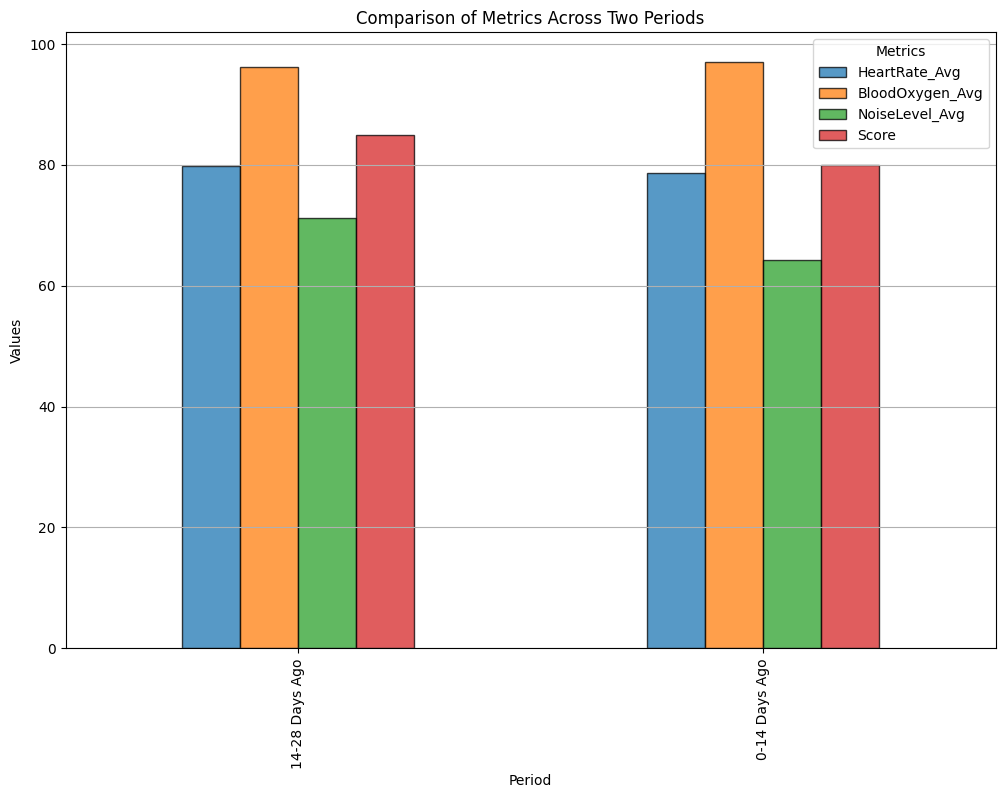

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
driver_history_df = pd.read_csv("/Users/gabeprice/Desktop/Hackday 2024/driver_history_output.csv")

# Ensure the data is sorted by date if there is a date column (assuming the data has a chronological order)
# driver_history_df.sort_values(by='Date', inplace=True)  # Uncomment if you have a Date column

# Select the rows corresponding to the last two periods
# Assuming the last two rows represent the last two two-week periods
last_period = driver_history_df.iloc[-1:]
prev_period = driver_history_df.iloc[-2:-1]

# Label the periods
last_period['Period'] = '0-14 Days Ago'
prev_period['Period'] = '14-28 Days Ago'

# Combine the two periods for comparison
comparison_df = pd.concat([prev_period, last_period])

# Set the index for easier plotting
comparison_df.set_index('Period', inplace=True)

# Plot the comparison using a bar plot
metrics = ['HeartRate_Avg', 'BloodOxygen_Avg', 'NoiseLevel_Avg', 'Score']

# Plotting
comparison_df[metrics].plot(kind='bar', figsize=(12, 8), alpha=0.75, edgecolor='black')
plt.title('Comparison of Metrics Across Two Periods')
plt.xlabel('Period')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


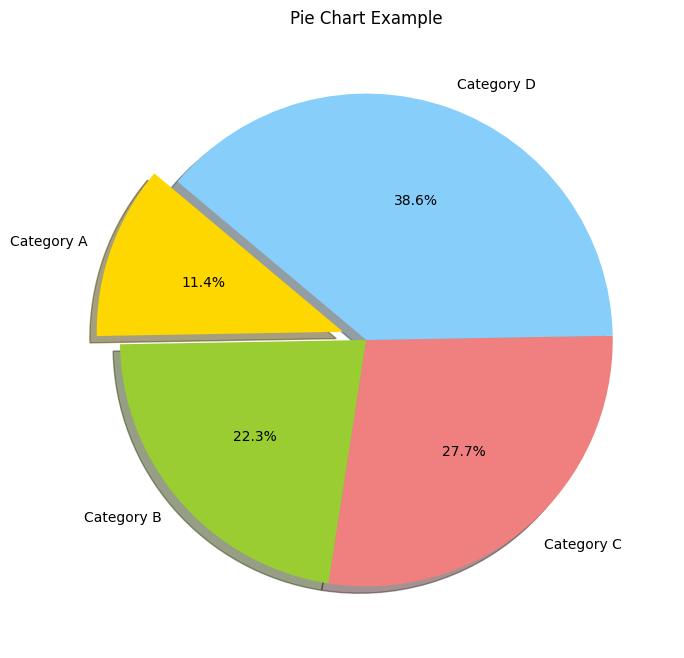

In [113]:
import matplotlib.pyplot as plt

# Example categorical data
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [23, 45, 56, 78]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice (Category A)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart Example')
plt.show()


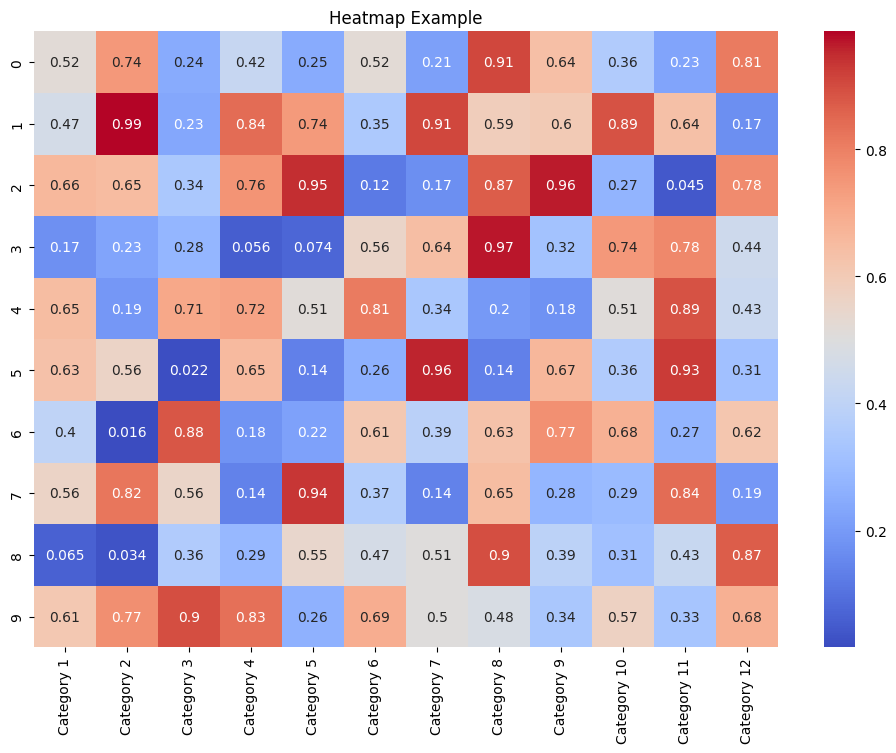

In [114]:
import seaborn as sns
import pandas as pd
import numpy as np

# Example data
data = np.random.rand(10, 12)
df = pd.DataFrame(data, columns=[f'Category {i}' for i in range(1, 13)])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='coolwarm', annot=True)
plt.title('Heatmap Example')
plt.show()


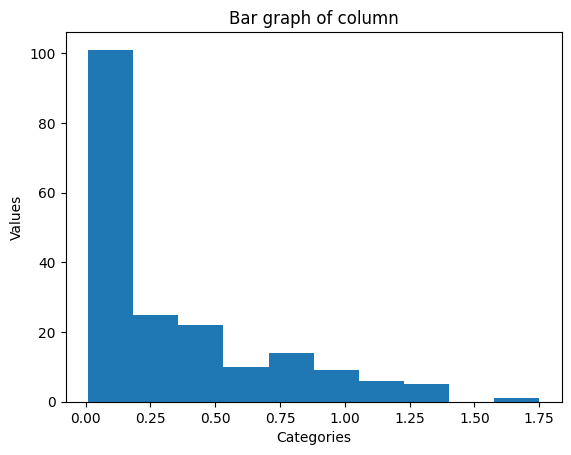

,HeartRate,BloodOxygenLevel,NoiseLevel,Traffic Patterns,Score,Precipitation Levels
0,98,98,73,heavy,87,0.32
1,88,97,64,heavy,81,0.73
2,74,99,74,no traffic,91,0.03
3,67,97,76,light,92,0.40
4,80,98,73,no traffic,85,0.13
...,...,...,...,...,...,...
195,81,96,71,heavy,81,0.06
196,70,97,67,light,88,0.18
197,75,99,63,heavy,81,0.01
198,92,95,67,heavy,81,0.01


In [160]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Dummy DriverHistory function adjusted to work with individual rows
def DriverHistory(row, knn_model):
    new_data = pd.DataFrame({
        'HeartRate': [row['HeartRate']],
        'BloodOxygenLevel': [row['BloodOxygenLevel']],
        'NoiseLevel': [row['NoiseLevel']]
    })

    # Predict the score for the new data point using the trained KNN model
    new_score_pred = knn_model.predict(new_data)
    curr = round(new_score_pred[0])

    return curr

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 200

# Generate random data for the numerical columns
avg_heart_rate = np.random.randint(60, 100, size=num_rows)
avg_blood_oxygen = np.random.randint(95, 100, size=num_rows)
avg_noise_level = np.random.randint(60, 80, size=num_rows)

# Generate random data for the categorical columns
traffic_patterns = np.random.choice(['heavy', 'light', 'no traffic'], size=num_rows)
weather_conditions = np.random.choice(['raining', 'sunny', 'cloudy', 'snowing', 'icy roads'], size=num_rows)

# Create the DataFrame
data = {
    'HeartRate': avg_heart_rate,
    'BloodOxygenLevel': avg_blood_oxygen,
    'NoiseLevel': avg_noise_level,
    'Traffic Patterns': traffic_patterns,
}
new_df = pd.DataFrame(data)

# Load or create your KNN regressor model (for the sake of the example, I'll quickly train a model)
# Here we assume you already have a trained model knn_regressor
# For demonstration, I'm training a quick model on random data
X = df[['HeartRate', 'BloodOxygenLevel', 'NoiseLevel']]
y = np.random.randint(70, 100, size=num_rows)  # Dummy target variable
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Apply the DriverHistory function to each row of the DataFrame
new_df['Score'] = new_df.apply(lambda row: DriverHistory(row, knn_regressor), axis=1)

newer_df = pd.DataFrame()

# Read the CSV file into a DataFrame
weather = pd.read_csv("/Users/gabeprice/Downloads/weatherupdate - 3714855.csv")

# Count the occurrences of '0.00' values in the 'PRCP' column
zero_count = (weather['PRCP'] == 0.00).sum()

# Filter out '0.00' values if the count is greater than 30, else include all
if zero_count > 30:
    filtered_prcp = weather.loc[weather['PRCP'] != 0.00, 'PRCP'].head(200)
else:
    filtered_prcp = weather['PRCP'].head(200)

# Assign the filtered precipitation levels to the new DataFrame
newer_df["Precipitation Levels"] = filtered_prcp
newer_df.reset_index(drop=True, inplace=True)
new_df['Precipitation Levels'] = newer_df['Precipitation Levels']

# Plotting
plt.hist(new_df['Precipitation Levels'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar graph of column')
plt.show()

new_df

In [181]:
def WeatherPrompt(score, precipitation):
    if score > 85:
        return "You drive great! Your current score is: " + str(score)
    if 0.3 < precipitation < 0.7:
        if 75 <= score <= 85:
            return "You should be more cautious when driving in moderate precipitation. Your current driving score is: " + str(score)
        elif score < 70:
            return "Your driving performance is inadequate for moderate precipitation. Your current driving score is: " + str(score)
    elif 0.7 <= precipitation < 1.1:
        if 70 <= score <= 80:
            return "You should exercise extreme caution when driving in heavy precipitation. Your current driving score is: " + str(score)
        elif score < 70:
            return "Your driving performance is unsatisfactory for heavy precipitation. Your current driving score is: " + str(score)
    else:
        if 60 <= score <= 75:
            return "You should be more attentive to road safety. Your current driving score is: " + str(score)
        elif score < 60:
            return "Your driving performance is dangerously low. Immediate improvement is necessary. Your current driving score is: " + str(score)

def TrafficPrompt(score, traffic):
    if score > 85:
        return "You drive great! Your current score is: " + str(score)
    if traffic == "Heavy":
        if 75 <= score <= 85:
            return "You should be more cautious when driving in heavy traffic. Your current driving score is: " + str(score)
        elif score < 70:
            return "Your driving performance is inadequate for heavy traffic. Your current driving score is: " + str(score)
    elif traffic == "Light":
        if 70 <= score <= 80:
            return "You should exercise extreme caution when driving in light traffic. Your current driving score is: " + str(score)
        elif score < 70:
            return "Your driving performance is unsatisfactory for light traffic. Your current driving score is: " + str(score)
    else:
        if 60 <= score <= 75:
            return "You should be more attentive to road safety. Your current driving score is: " + str(score)
        elif score < 60:
            return "Your driving performance is dangerously low. Immediate improvement is necessary. Your current driving score is: " + str(score)

# Example usage
score = 87
precipitation = 0.9
message = WeatherPrompt(score, precipitation)
print(message)


You drive great! Your current score is: 87
